In [1]:
# Importing the dataset
dataset = read.csv("../heights-and-weights/data.csv")
head(dataset, n = 10)

Height,Weight
1.47,52.21
1.50,53.12
1.52,54.48
1.55,55.84
1.57,57.20
1.60,58.57
1.63,59.93
1.65,61.29
1.68,63.11
1.70,64.47


In [2]:
dim(dataset)

[1] 15  2

In [3]:
str(dataset)

'data.frame':	15 obs. of  2 variables:
 $ Height: num  1.47 1.5 1.52 1.55 1.57 1.6 1.63 1.65 1.68 1.7 ...
 $ Weight: num  52.2 53.1 54.5 55.8 57.2 ...


In [4]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Weight, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [5]:
dim(training_set)

[1] 10  2

In [6]:
dim(test_set)

[1] 5 2

In [7]:
# Fitting simple Linear Regression to the Training set
regressor = lm(formula = Weight ~ Height,
               data = training_set)
summary(regressor)


Call:
lm(formula = Weight ~ Height, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9735 -0.6873 -0.2297  0.6840  1.2066 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -39.748      4.110  -9.672 1.09e-05 ***
Height        61.750      2.446  25.241 6.50e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8842 on 8 degrees of freedom
Multiple R-squared:  0.9876,	Adjusted R-squared:  0.986 
F-statistic: 637.1 on 1 and 8 DF,  p-value: 6.499e-09


In [8]:
# Predicting the Test set results
y_pred = predict(regressor, newdata = test_set)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


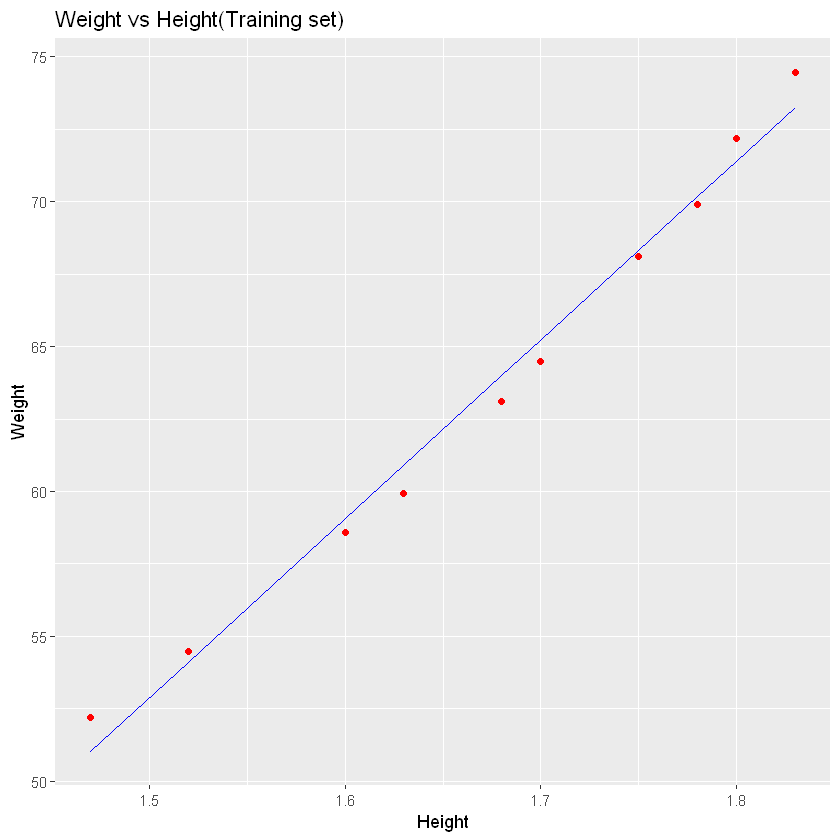

In [9]:
# Visualising the Training set results
library(ggplot2)
ggplot()+
  geom_point(aes(x = training_set$Height, y = training_set$Weight),
             colour = 'red')+
  geom_line(aes(x = training_set$Height, y =predict(regressor, newdata = training_set)),
            colour = 'blue')+
  ggtitle('Weight vs Height(Training set)')+
  xlab('Height')+
  ylab('Weight')

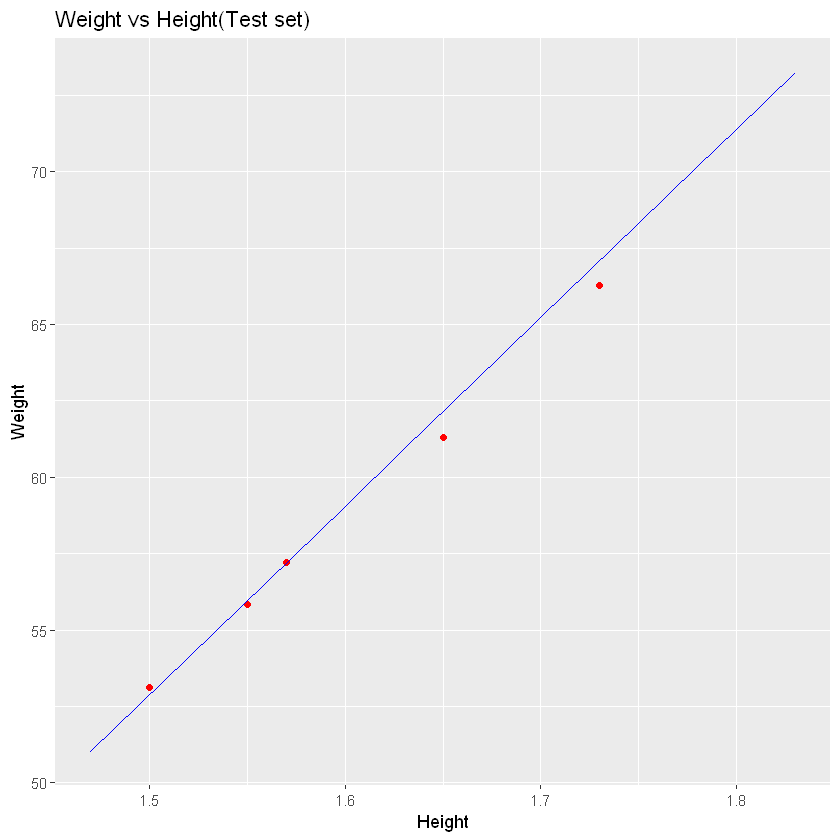

In [10]:
# Visualising the Test set results
library(ggplot2)
ggplot()+
  geom_point(aes(x = test_set$Height, y = test_set$Weight),
             colour = 'red')+
  geom_line(aes(x = training_set$Height, y =predict(regressor, newdata = training_set)),
            colour = 'blue')+
  ggtitle('Weight vs Height(Test set)')+
  xlab('Height')+
  ylab('Weight')